<div style="font-size:37px; font-weight:bold; line-height:1.1">
    Simple landscape evolution with pyrunchild
</div>

<p style="color:rgb(90,90,90);">
CSIRO Open Source Software Licence Agreement (variation of the BSD / MIT License)
    <br>
Copyright (c) 2021, Commonwealth Scientific and Industrial Research Organisation (CSIRO) ABN 41 687 119 230.
All rights reserved. CSIRO is willing to grant you a licence to this Python package on the following terms, except where otherwise indicated for third party material.
    <br>
Redistribution and use of this software in source and binary forms, with or without modification, are permitted provided that the following conditions are met:
    <br>
* Redistributions of source code must retain the above copyright notice, this list of conditions and the following disclaimer.
    <br>
* Redistributions in binary form must reproduce the above copyright notice, this list of conditions and the following disclaimer in the documentation and/or other materials provided with the distribution.
    <br>
* Neither the name of CSIRO nor the names of its contributors may be used to endorse or promote products derived from this software without specific prior written permission of CSIRO.
    <br>
EXCEPT AS EXPRESSLY STATED IN THIS AGREEMENT AND TO THE FULL EXTENT PERMITTED BY APPLICABLE LAW, THE SOFTWARE IS PROVIDED "AS-IS". CSIRO MAKES NO REPRESENTATIONS, WARRANTIES OR CONDITIONS OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO ANY REPRESENTATIONS, WARRANTIES OR CONDITIONS REGARDING THE CONTENTS OR ACCURACY OF THE SOFTWARE, OR OF TITLE, MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE, NON-INFRINGEMENT, THE ABSENCE OF LATENT OR OTHER DEFECTS, OR THE PRESENCE OR ABSENCE OF ERRORS, WHETHER OR NOT DISCOVERABLE.
    <br>
TO THE FULL EXTENT PERMITTED BY APPLICABLE LAW, IN NO EVENT SHALL CSIRO BE LIABLE ON ANY LEGAL THEORY (INCLUDING, WITHOUT LIMITATION, IN AN ACTION FOR BREACH OF CONTRACT, NEGLIGENCE OR OTHERWISE) FOR ANY CLAIM, LOSS, DAMAGES OR OTHER LIABILITY HOWSOEVER INCURRED.  WITHOUT LIMITING THE SCOPE OF THE PREVIOUS SENTENCE THE EXCLUSION OF LIABILITY SHALL INCLUDE: LOSS OF PRODUCTION OR OPERATION TIME, LOSS, DAMAGE OR CORRUPTION OF DATA OR RECORDS; OR LOSS OF ANTICIPATED SAVINGS, OPPORTUNITY, REVENUE, PROFIT OR GOODWILL, OR OTHER ECONOMIC LOSS; OR ANY SPECIAL, INCIDENTAL, INDIRECT, CONSEQUENTIAL, PUNITIVE OR EXEMPLARY DAMAGES, ARISING OUT OF OR IN CONNECTION WITH THIS AGREEMENT, ACCESS OF THE SOFTWARE OR ANY OTHER DEALINGS WITH THE SOFTWARE, EVEN IF CSIRO HAS BEEN ADVISED OF THE POSSIBILITY OF SUCH CLAIM, LOSS, DAMAGES OR OTHER LIABILITY.
    <br>
APPLICABLE LEGISLATION SUCH AS THE AUSTRALIAN CONSUMER LAW MAY APPLY REPRESENTATIONS, WARRANTIES, OR CONDITIONS, OR IMPOSES OBLIGATIONS OR LIABILITY ON CSIRO THAT CANNOT BE EXCLUDED, RESTRICTED OR MODIFIED TO THE FULL EXTENT SET OUT IN THE EXPRESS TERMS OF THIS CLAUSE ABOVE "CONSUMER GUARANTEES".  TO THE EXTENT THAT SUCH CONSUMER GUARANTEES CONTINUE TO APPLY, THEN TO THE FULL EXTENT PERMITTED BY THE APPLICABLE LEGISLATION, THE LIABILITY OF CSIRO UNDER THE RELEVANT CONSUMER GUARANTEE IS LIMITED (WHERE PERMITTED AT CSIRO'S OPTION) TO ONE OF FOLLOWING REMEDIES OR SUBSTANTIALLY EQUIVALENT REMEDIES:
    <br>
(a)               THE REPLACEMENT OF THE SOFTWARE, THE SUPPLY OF EQUIVALENT SOFTWARE, OR SUPPLYING RELEVANT SERVICES AGAIN;
    <br>
(b)               THE REPAIR OF THE SOFTWARE;
    <br>
(c)               THE PAYMENT OF THE COST OF REPLACING THE SOFTWARE, OF ACQUIRING EQUIVALENT SOFTWARE, HAVING THE RELEVANT SERVICES SUPPLIED AGAIN, OR HAVING THE SOFTWARE REPAIRED.
    <br>
IN THIS CLAUSE, CSIRO INCLUDES ANY THIRD PARTY AUTHOR OR OWNER OF ANY PART OF THE SOFTWARE OR MATERIAL DISTRIBUTED WITH IT.  CSIRO MAY ENFORCE ANY RIGHTS ON BEHALF OF THE RELEVANT THIRD PARTY.
</p>

Example showing how to use pyrunchild to simulate landscape evolution with CHILD.

# Package imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar

import pyrunchild as pyrc

# Simulation

First, we need to specify where is CHILD's executable.

In [2]:
child_executable = '~/Files/Pro/Applications/child/Child/Bin/./child'

Now let's specify a base directory into which CHILD will save all the output files, and a base name for those files.

In [3]:
base_directory = './CHILD_Outputs'
base_name = 'simple_landscape'

child = pyrc.Child(base_directory,
                   base_name,
                   child_executable=child_executable,
                   init_realization_nb=None,
                   seed=42)

Then we need to set up the parameters for the modules we're interested in.

In [4]:
child.set_run_control(OUTFILENAME=base_name,
                      RUNTIME=100000.,
                      OPINTRVL=10000.,
                      SEED=42)
child.set_mesh(OPTREADINPUT=10,
               X_GRID_SIZE=10000.,
               Y_GRID_SIZE=10000.,
               GRID_SPACING=200.)
child.set_boundaries(TYP_BOUND=1,
                     MEAN_ELEV=0.,
                     RAND_ELEV=1.)
child.set_grainsize(NUMGRNSIZE=1,
                    REGPROPORTIONi=(1.,),
                    BRPROPORTIONi=(1.,),
                    GRAINDIAMi=(0.001,))
child.set_bedrock(BEDROCKDEPTH=1e8,
                  REGINIT=1e8,
                  MAXREGDEPTH=100.)
child.set_rainfall(OPTVAR=1,
                   ST_PMEAN=100.,
                   ST_STDUR=10.,
                   ST_ISTDUR=1.)
child.set_tectonics(OPTNOUPLIFT=0,
                    UPTYPE=2,
                    UPDUR=1e8,
                    UPRATE=0.001,
                    FAULTPOS=10000/3)
child.set_runoff(FLOWGEN=0,
                 LAKEFILL=1)
child.set_hydraulic_geometry(CHAN_GEOM_MODEL=1,
                             HYDR_WID_COEFF_DS=10.,
                             HYDR_WID_EXP_DS=0.5,
                             HYDR_WID_EXP_STN=0.5,
                             HYDR_DEP_COEFF_DS=1.,
                             HYDR_DEP_EXP_DS=0.,
                             HYDR_DEP_EXP_STN=0.,
                             HYDR_ROUGH_COEFF_DS=0.03,
                             HYDR_ROUGH_EXP_DS=0.,
                             HYDR_ROUGH_EXP_STN=0.,
                             BANK_ROUGH_COEFF=15.,
                             BANK_ROUGH_EXP=0.8,
                             BANKFULLEVENT=10.)
child.set_fluvial_transport(OPTNOFLUVIAL=0,
                            DETACHMENT_LAW=1,
                            KB=1e-2,
                            KR=1e-2,
                            KT=987.3,
                            MB=2/3,
                            NB=2/3,
                            PB=1.5,
                            TAUCB=30.,
                            TAUCR=30.,
                            BETA=1.,
                            OPTDETACHLIM=0,
                            TRANSPORT_LAW=2,
                            KF=617.,
                            MF=2/3,
                            NF=2/3,
                            PF=1.5)
child.set_hillslope_transport(KD=1e-3)
child.set_various(OPTTSOUTPUT=0)

And we can run the simulation.

In [5]:
%%time

child.run(print_log=True,
          save_previous_input_file=False)

tLithologyManager default constructor

This is CHILD, version 9.5.0dev, May 2009 (compiled Mar  2 2021 10:35:32)

Creating mesh...
In tLNode, reading 'BRPROPORTION1
OPEN SIDE boundary
In tLNode, reading 'BRPROPORTION1
Computing triangulation...elapsed time (time)= 0 s (clock)= 0.002503 s
done.
Creating edge list...done.
Setting up edg pointer...done.
Setting up CCW and CW edges...done.
Setting up triangle connectivity...done.
EDGES PASSED
NODES PASSED
TRIANGLES PASSED
MESH PASSED
EDGES PASSED
NODES PASSED
TRIANGLES PASSED
MESH PASSED
MakeMeshFromScratchTipper done.
tLithologyManager::InitializeFromInputFile
Creating output handler...
 Use `ST_PMEAN' instead.
 Use `ST_PMEAN' instead.
Initializing stream network...
Initializing erosion/transport/sedimentation...
DETACHMENT OPTION: Power law, form 2
SEDIMENT TRANSPORT OPTION: Bridge-Dominic form of Bagnold bedload formula
SOIL PRODUCTION OPTION: No soil production
CHEMICAL WEATHERING OPTION: No chemical weathering
Initializing tectonics/b

20310.7
20314.6
20329.2
20350.6
20358.1
20374.6
20390.7
20409.4
20415.3
20415.4
20420.2
20425.3
20432.6
20441.9
20462.3
20462.6
20478.6
20489.4
20493.7
20500.7
20506.2
20509.5
20520.8
20529
20532.5
20540.4
20565.4
20573.7
20580.6
20582.2
20599.6
20605
20606.2
20628.5
20645.1
20663.7
20669.4
20671.5
20673.8
20674.8
20680.3
20702.7
20719.9
20721.9
20733.9
20739.6
20760.8
20765.2
20783
20783.7
20788.7
20807.2
20819.3
20821.4
20822.2
20835.1
20848.2
20852.1
20863.5
20879
20883.2
20884.6
20931.2
20934.1
20937.1
20955.5
20960.4
20970.7
20987.8
21000.9
21002.1
21024.6
21029.1
21032.4
21040.5
21043.9
21047.1
21047.9
21052.2
21059.7
21063.5
21072.4
21077
21079.4
21095.7
21105.1
21109.3
21132
21157.9
21174.7
21181.3
21188.8
21194.5
21247.4
21251.4
21256.1
21280
21281.2
21290.8
21299.2
21306
21313.9
21316.6
21326.1
21329.4
21344.4
21354.4
21362.1
21376.8
21377.5
21400.6
21423.3
21442.7
21446.5
21513
21531.2
21532.8
21537.4
21551.6
21555.7
21569
21589.2
21595.6
21600.8
21614.8
21624.9
21629.4
2163

36580.2
36581.4
36598.5
36608
36644.5
36650.9
36653.7
36666.6
36668.9
36687.6
36701.5
36713.7
36721.1
36725.8
36729.1
36734.6
36739.7
36745.9
36752.7
36764.4
36774
36780.5
36785
36788.5
36793
36803.8
36816.8
36823.2
36835.2
36851.2
36864.5
36867.7
36873.3
36883.5
36886.3
36916.3
36942.2
36942.8
36955.2
36965.2
37021.2
37030.5
37034.2
37044.2
37045.9
37084.4
37085.7
37086.4
37097.5
37098.3
37099.8
37110.9
37127.5
37130.7
37140.4
37140.9
37154
37159.5
37165.7
37171
37199.7
37209.5
37211.5
37215.3
37229.3
37230.6
37248.1
37284.3
37287.6
37314.2
37322.3
37326.3
37331.8
37362.3
37378.9
37379.4
37386.4
37400.6
37430.5
37438.6
37448.1
37453.9
37458.2
37464.1
37466
37470.7
37516.8
37525.8
37529.6
37555.9
37557
37578.5
37582
37599.6
37605.1
37609.7
37622.7
37627.7
37648.5
37655.3
37668.3
37669.1
37722.1
37728.2
37738.7
37740.8
37749.3
37757.6
37765.2
37780.1
37804.1
37831.6
37848.2
37852.8
37891
37892.8
37904.2
37920.4
37923
37928.5
37931.1
37935.5
37942.7
37952.2
37961.8
37977.7
38009.6
38042.

52781.4
52791.2
52796.1
52799.3
52805
52809.1
52818.4
52819.6
52833.9
52849.1
52889.4
52891.8
52893.5
52894.4
52902.2
52936.5
52948.2
52963.3
52969.9
52985.4
52996.8
53003.1
53015.5
53018.4
53022.5
53030.4
53040.4
53057.1
53066.5
53088
53094.8
53097.5
53119.8
53130.1
53142.9
53144.2
53157.2
53202.7
53216
53216.1
53222.9
53239.2
53259.6
53264.6
53273
53282.2
53294.2
53302.8
53305.2
53307.4
53308.7
53327.4
53338.5
53341.8
53356.9
53366.4
53368
53386.5
53398.8
53431.9
53458.8
53471.5
53474.5
53477.6
53496
53498.3
53561.2
53570.4
53574
53590.5
53596.4
53610.3
53611.6
53614.3
53625.2
53636.5
53642.4
53645.5
53656.1
53675.6
53726.4
53732.3
53739.9
53745.8
53771.7
53786.1
53799.9
53819.4
53838.8
53849.8
53856.2
53858.7
53872.5
53873.7
53881.2
53890.1
53897.6
53905.6
53917.7
53919.3
53924
53924.7
53930
53973.7
53984.3
53986.9
53992.2
54006.2
54008.7
54022.3
54034.1
54041.1
54041.9
54060
54071.4
54076.7
54086.4
54108.6
54161.2
54177.1
54201.4
54210.2
54210.7
54230.3
54232.1
54238.6
54247.9
5425

71275.7
71280.3
71294.7
71305.2
71311.3
71326.1
71343.2
71353.2
71371.3
71376.1
71399.3
71401.4
71407.9
71410.4
71418.3
71434
71449.7
71464.4
71465.5
71477.2
71484.7
71488.5
71493.3
71507.8
71519.7
71530
71546.3
71546.8
71548.5
71550.9
71555.1
71575.9
71585.5
71590.8
71594.2
71604.6
71612.1
71638.5
71640.7
71647.9
71653.5
71670.2
71675.8
71677.3
71709.9
71713.5
71721.2
71726.8
71736.7
71739.7
71756.3
71762.5
71784.4
71793.1
71813.6
71831.3
71846.8
71850.2
71879.2
71889.3
71906.4
71910.3
71915.4
71916.2
71932
71941.8
71951.8
71966
71969.3
71984.3
71996.6
72023.4
72030
72032.4
72039.6
72043.9
72051.7
72055.3
72057.9
72059.2
72061.4
72063.3
72064.4
72068.7
72081.4
72084.8
72088.3
72104.9
72125.5
72133.3
72139
72158.6
72184.9
72186.9
72204.8
72206.7
72211.6
72214.6
72218.8
72221.2
72225.1
72228.1
72232.2
72233.6
72240.1
72248.9
72259.6
72266.5
72269.3
72279.1
72295.4
72303.8
72334.1
72337
72353.8
72379.7
72394.7
72407.4
72415.9
72430.7
72467.9
72468.8
72476.3
72494.8
72506.8
72512.5
72536.

85717
85742.8
85761
85765.1
85770.9
85773.9
85775
85776.6
85783.3
85787.3
85793.9
85795.9
85804.2
85809.9
85817.1
85834.5
85842.3
85848.1
85851.3
85866.9
85888.9
85905.2
85906.3
85912.3
85944.1
85946.4
85957.5
85988.3
85994.6
86002.8
86006.2
86046.4
86048.8
86064.5
86066.4
86071.5
86078.3
86086.9
86107.5
86114.6
86115.8
86119.1
86132.9
86136.9
86142.5
86146.8
86150.5
86154.1
86157.3
86170.6
86177.1
86182.9
86220.4
86228
86234.5
86235
86253.6
86258.9
86275.1
86277.9
86295.7
86318.8
86329.1
86329.6
86331.1
86333.5
86354.7
86362.9
86377.9
86405
86438.8
86473.2
86483.1
86500.9
86507.2
86510
86512.1
86513.6
86521.4
86543.5
86549
86552.1
86555.3
86580.5
86581.8
86584.7
86590.5
86600.3
86618.4
86635.2
86640.6
86647.1
86650.8
86671.6
86677.3
86688.7
86693
86713.5
86747
86773.8
86778.4
86791.3
86793.6
86802.3
86812.8
86817
86863.4
86887
86904.5
86911.1
86923.2
86933.1
86940
86947.6
86980.5
87004.2
87009.8
87015.1
87021.5
87041.5
87044
87054.6
87068
87074.8
87082
87090.7
87098.6
87108.7
87119.1


Let's import topography and discharge from the output files.

In [6]:
nodes, time_slices = child.read_nodes()
triangles, _ = child.read_triangles()
q, _ = child.read_output_file('q')

And plot the evolution of topography through time.

/Users/ron032/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: UserWarning: The following kwargs were not used by contour: 'mask'


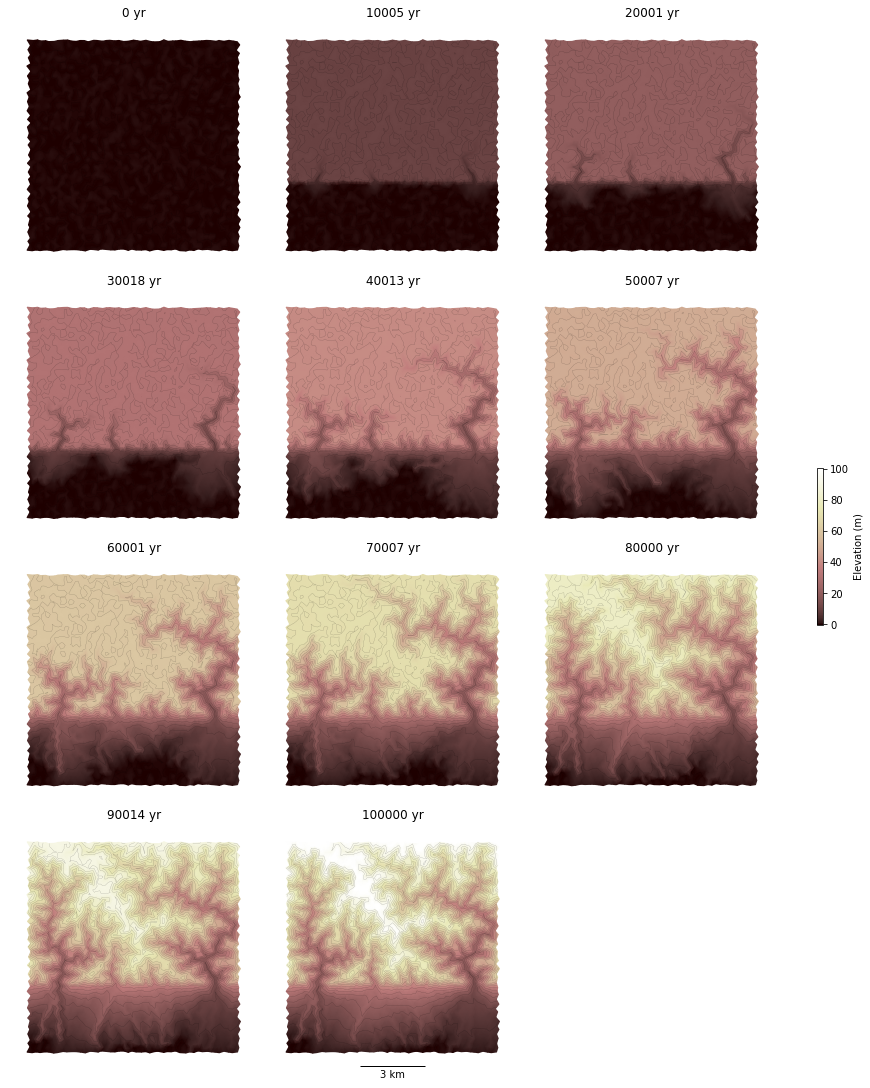

In [7]:
ncols = 3
nrows = int(np.ceil(len(nodes)/ncols))
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 15), constrained_layout=True)

vmin = min([np.min(n[n[:, 3] == 0, 2]) for n in nodes])
vmax = max([np.max(n[n[:, 3] == 0, 2]) for n in nodes])

for j in range(nrows):
    for i in range(ncols):
        k = j*ncols + i
        axs[j, i].axis('off')
        if k < len(nodes):
            triangle_mask = np.any((nodes[k][:, 3] != 0)[triangles[k]], axis=-1)
            axs[j, i].set_title(str(round(time_slices[k])) + ' yr')
            tripcolor = axs[j, i].tripcolor(nodes[k][:, 0],
                                            nodes[k][:, 1],
                                            nodes[k][:, 2],
                                            triangles=triangles[k],
                                            mask=triangle_mask,
                                            cmap='pink',
                                            vmin=vmin,
                                            vmax=vmax,
                                            shading='gouraud')     
            axs[j, i].tricontour(nodes[k][:, 0],
                                 nodes[k][:, 1],
                                 triangles[k],
                                 nodes[k][:, 2],
                                 mask=triangle_mask,
                                 levels=range(0, 100, 5),
                                 colors='k',
                                 alpha=0.35,
                                 linewidths=0.25)
            axs[j, i].axis('equal')

fig.colorbar(tripcolor, ax=axs, label='Elevation (m)', shrink=0.15, aspect=25)
scalebar = AnchoredSizeBar(axs[-1, -2].transData,
                           3000,
                           '3 km',
                           'center',
                           sep=4,
                           frameon=False,
                           bbox_to_anchor=(5000, -750),
                           bbox_transform=axs[-1, -2].transData)
axs[-1, -2].add_artist(scalebar)

plt.show()